In [1]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break
        aa_seq_string += mito_table.forward_table[codon]
    return aa_seq_string

In [15]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    for i in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[i:i+3]
        print("Codon:", codon)  # Debug print
        if codon in mito_table.stop_codons:
            print("Stop codon found:", codon)  # Debug print
            break
        translated_aa = mito_table.forward_table.get(codon, "?")
        print("Translated AA:", translated_aa)  # Debug print
        aa_seq_string += translated_aa
    return aa_seq_string

#Example set
test_seq = "ATGCGACTACGTTAGGACTAA"  # Example sequence with a known translation
print("Output:", translate_function(test_seq))


Codon: ATG
Translated AA: M
Codon: CGA
Translated AA: R
Codon: CTA
Translated AA: L
Codon: CGT
Translated AA: R
Codon: TAG
Stop codon found: TAG
Output: MRLR


In [4]:
## 3. Write an alternative translation function.
from Bio.Seq import Seq

def translate_function_biopython(dna_seq):
    dna_sequence = Seq(dna_seq)
    return str(dna_sequence.translate(table="Vertebrate Mitochondrial", to_stop=True))
#Example set
test_seq = "ATGCGACTACGTTAGGACTAA"  # Example sequence with a known translation
result = translate_function_biopython(test_seq)
print("Translated sequence:", result)

Translated sequence: MRLR


In [13]:
## 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
def compute_molecular_weight(aa_seq):
    analyzed_seq = ProteinAnalysis(aa_seq)
    return analyzed_seq.molecular_weight()


In [14]:
## 5. Write a function that computes the GC-content of each DNA sequence.
def calculate_gc_content(dna_seq):
    g = dna_seq.count('G')
    c = dna_seq.count('C')
    return (g + c) / len(dna_seq) * 100

In [7]:
import pandas as pd

In [8]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [19]:
6. #Add new columns for molecular weight and GC content in the DataFrame:
penguins_df = pd.read_csv("penguins_mass.csv")
penguins_df['Molecular_Weight'] = pd.NA
penguins_df['GC_Content'] = pd.NA
# Display the first few rows to verify the new columns
print(penguins_df.head())

                   species   mass Molecular_Weight GC_Content
0     Aptenodytes forsteri  28.00             <NA>       <NA>
1  Aptenodytes patagonicus  13.40             <NA>       <NA>
2      Eudyptes chrysocome   2.80             <NA>       <NA>
3    Eudyptes chrysolophus   4.50             <NA>       <NA>
4        Eudyptes sclateri   4.25             <NA>       <NA>


In [22]:
7.#Fill the DataFrame with calculated data
from Bio import SeqIO

def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
for species, dna_seq in cytb_seqs.items():
    print(species, dna_seq) 
 
for species, dna_seq in cytb_seqs.items():
    aa_seq = translate_function_biopython(dna_seq)
    molecular_weight = compute_molecular_weight(aa_seq)
    gc_content = calculate_gc_content(dna_seq)

    # Update the DataFrame with the calculated molecular weight and GC content
    penguins_df.loc[penguins_df['species'] == species, 'Molecular_Weight'] = molecular_weight
    penguins_df.loc[penguins_df['species'] == species, 'GC_Content'] = gc_content

# Displaying the updated DataFrame
print(penguins_df.head())

Aptenodytes forsteri ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCGCCCTCTCTCCCAACTCCTATTCT

                   species   mass
0     Aptenodytes forsteri  28.00
1  Aptenodytes patagonicus  13.40
2      Eudyptes chrysocome   2.80
3    Eudyptes chrysolophus   4.50
4        Eudyptes sclateri   4.25


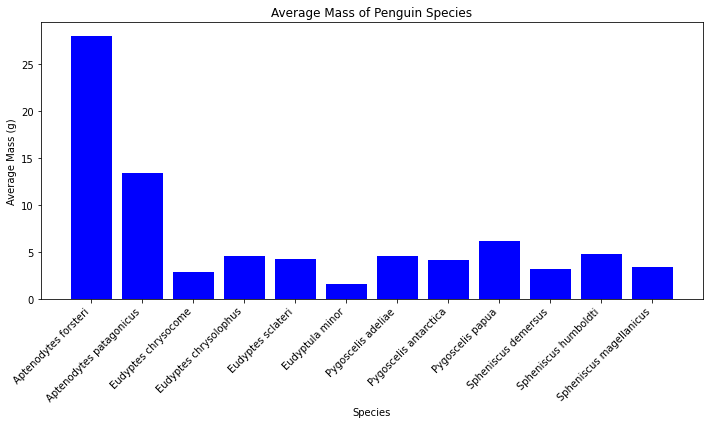

The smallest penguin species is: Eudyptula minor
Object `???????????????????????????????????????????` not found.


In [21]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.

import matplotlib.pyplot as plt
penguins_df = pd.read_csv("penguins_mass.csv")  # Adjust this line if your DataFrame is already loaded and prepared
print(penguins_df.head())

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(penguins_df['species'], penguins_df['mass'], color='blue')
plt.xlabel('Species')  # Label for the x-axis
plt.ylabel('Average Mass (g)')  # Label for the y-axis
plt.title('Average Mass of Penguin Species')  # Title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate species names for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()
## *Q1* What is the smallest penguin species? 
# Find the species with the smallest body mass
smallest_species = penguins_df.loc[penguins_df['mass'].idxmin()]
print("The smallest penguin species is:", smallest_species['species'])
#The smallest penguin species is: Eudyptula minor
## *Q2* What is the geographical range of this species?
?????????????????????????????????????????????

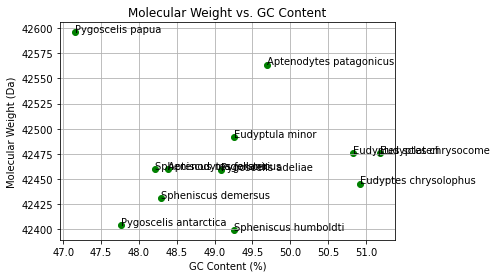

In [23]:
9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).plt.figure(figsize=(10, 6))  # Set the size of the plot for better readability

plt.scatter(penguins_df['GC_Content'], penguins_df['Molecular_Weight'], color='green')
plt.title('Molecular Weight vs. GC Content')  # Title of the plot
plt.xlabel('GC Content (%)')  # Label for the x-axis
plt.ylabel('Molecular Weight (Da)')  # Label for the y-axis
plt.grid(True)  # Optional: add a grid for easier readability
for i, txt in enumerate(penguins_df['species']):
    plt.annotate(txt, (penguins_df['GC_Content'][i], penguins_df['Molecular_Weight'][i]))
plt.show()